### Process_CoreBx_multi_v3

Read the interpolated DEMs and do volume calcs.
This version was modifed in Santa Cruz to make new figure, and on the return to Woods Hole to process newest DEMs.
v3 now uses EBK surface for filling, and offers choice of "extend" or "clip" for profiles. Also includes and option to plot profiles.

None of the v3 stuff has actually been implemented yet.

This reads the .nc files created by `CoreBx_multi`

TODO:
* Correct aspect ratio on maps?
* Equal axes for all line plots?
* Add labels to colorbars
* Add a), b), ...
* Remove titles?
* If the x, y labeling changes in CoreBx_multi, then correct here too.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import xarray as xr
# from dask.distributed import LocalCluster
from scipy import interpolate, signal
%matplotlib inline

# These commands choose fonts that are editable in svg format
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# colors
dblue = '#1f77b4'
# profiles colors
cols=['#feedde','#fdbe85','#fd8d3c','#e6550d','#a63603']


C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\IOOS\lib\site-packages\xarray\core\merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
# Dates for DEMs
dates = ([\
         "30 Aug 2019",\
         "13 Sep 2019",\
         "11 Oct 2019",\
         "26 Nov 2019"])

pnames=['28-Aug','13-Sep','11-Oct','26-Nov']

datum = 0.4 #elevation for volume calcs

# Make an array of dicts, where analysis region is defined by:
#  name
#  e0 - UTM Easting of origin [m]
#  n0 - UTM Northing of origin [m]
#  xlen - Length of alongshore axis [m]
#  ylen - Length of cross-shore axis [m]
#  dxdy - grid size (must be isotropic right now) [m]
#  theta - rotation CCW from x-axis [deg]
#  xs_end - number of grid cells to approximate limit of overwash terrace
#  d_end - number of grid cells to 

# This block is copied from CoreBx_multi, with addition of xs_end and d_end:
# (region_1 adjusted to fit in DEMS)
# (xs_end adjusted 1/24/2020)
regions = [{'name':"region_1","e0": 380500.,"n0": 3858240.,"xlen": 3400.,"ylen": 600.,"dxdy": 1.,"theta": 42.,'xs_end':400,'d_end':300},
           {'name':"region_2","e0": 383440.,"n0": 3860830.,"xlen": 3990.,"ylen": 700.,"dxdy": 1.,"theta": 41.,'xs_end':300,'d_end':200},
           {'name':"region_3","e0": 386485.,"n0": 3863430.,"xlen": 1200.,"ylen": 700.,"dxdy": 1.,"theta": 44.,'xs_end':350,'d_end':200},
           {'name':"region_4","e0": 387330.,"n0": 3864280.,"xlen": 4000.,"ylen": 700.,"dxdy": 1.,"theta": 45.,'xs_end':350,'d_end':200},
           {'name':"region_5","e0": 390140.,"n0": 3867115.,"xlen": 3400.,"ylen": 700.,"dxdy": 1.,"theta": 43.75,'xs_end':300,'d_end':200},
           {'name':"region_6","e0": 392600.,"n0": 3869450.,"xlen": 2440.,"ylen": 700.,"dxdy": 1.,"theta": 42.,'xs_end':400,'d_end':200},
           {'name':"region_7","e0": 394430.,"n0": 3871065.,"xlen": 3220.,"ylen": 700.,"dxdy": 1.,"theta": 42.,'xs_end':400,'d_end':200},
           {'name':"region_8","e0": 396800.,"n0": 3873240.,"xlen": 3500.,"ylen": 700.,"dxdy": 1.,"theta": 42.,'xs_end':500,'d_end':250},
           {'name':"region_9","e0": 399400.,"n0": 3875580.,"xlen": 3300.,"ylen": 700.,"dxdy": 1.,"theta": 40.,'xs_end':450,'d_end':250}]

# Single region for debugging
#regions = [{'name':"region_3","e0": 386485.,"n0": 3863430.,"xlen": 1200.,"ylen": 700.,"dxdy": 1.,"theta": 44.,'xs_end':350,'d_end':200}]

clip
nmaps, ncross, nalong:  4 600 3400
ncrossf, nalongf:  600 3400


CoreBx_funcs.py:69: RuntimeWarning: All-NaN axis encountered
  profs[:,0:imx]=0.
CoreBx_funcs.py:128: RuntimeWarning: Mean of empty slice
  c, s = np.cos(thetar), np.sin(thetar)
CoreBx_funcs.py:129: RuntimeWarning: invalid value encountered in double_scalars
  


Done with volume calcs.


CoreBx_funcs.py:119: RuntimeWarning: Mean of empty slice
  2D rotation and translation of x, y
CoreBx_funcs.py:120: RuntimeWarning: Mean of empty slice
  Input:


nmaps, ncross, nalong:  4 700 3990
ncrossf, nalongf:  700 3990


CoreBx_funcs.py:128: RuntimeWarning: Mean of empty slice
  c, s = np.cos(thetar), np.sin(thetar)
CoreBx_funcs.py:129: RuntimeWarning: invalid value encountered in double_scalars
  


Done with volume calcs.
nmaps, ncross, nalong:  4 700 1200
ncrossf, nalongf:  700 1200
Done with volume calcs.
nmaps, ncross, nalong:  4 700 4000
ncrossf, nalongf:  700 4000
Done with volume calcs.
nmaps, ncross, nalong:  4 700 3400
ncrossf, nalongf:  700 3400
Done with volume calcs.
nmaps, ncross, nalong:  4 700 2440
ncrossf, nalongf:  700 2440


CoreBx_funcs.py:69: RuntimeWarning: All-NaN axis encountered
  profs[:,0:imx]=0.


Done with volume calcs.
nmaps, ncross, nalong:  4 700 3220
ncrossf, nalongf:  700 3220


CoreBx_funcs.py:69: RuntimeWarning: All-NaN axis encountered
  profs[:,0:imx]=0.


Done with volume calcs.
nmaps, ncross, nalong:  4 700 3500
ncrossf, nalongf:  700 3500


CoreBx_funcs.py:69: RuntimeWarning: All-NaN axis encountered
  profs[:,0:imx]=0.
CoreBx_funcs.py:128: RuntimeWarning: Mean of empty slice
  c, s = np.cos(thetar), np.sin(thetar)
CoreBx_funcs.py:129: RuntimeWarning: invalid value encountered in double_scalars
  


Done with volume calcs.


CoreBx_funcs.py:119: RuntimeWarning: Mean of empty slice
  2D rotation and translation of x, y


nmaps, ncross, nalong:  4 700 3300
ncrossf, nalongf:  700 3300


CoreBx_funcs.py:69: RuntimeWarning: All-NaN axis encountered
  profs[:,0:imx]=0.
CoreBx_funcs.py:128: RuntimeWarning: Mean of empty slice
  c, s = np.cos(thetar), np.sin(thetar)
CoreBx_funcs.py:129: RuntimeWarning: invalid value encountered in double_scalars
  
CoreBx_funcs.py:119: RuntimeWarning: Mean of empty slice
  2D rotation and translation of x, y


Done with volume calcs.
extend
nmaps, ncross, nalong:  4 600 3400
ncrossf, nalongf:  600 3400


CoreBx_funcs.py:69: RuntimeWarning: All-NaN axis encountered
  profs[:,0:imx]=0.
CoreBx_funcs.py:89: RankWarning: Polyfit may be poorly conditioned
  if iplot:
CoreBx_funcs.py:128: RuntimeWarning: Mean of empty slice
  c, s = np.cos(thetar), np.sin(thetar)
CoreBx_funcs.py:129: RuntimeWarning: invalid value encountered in double_scalars
  


Done with volume calcs.


CoreBx_funcs.py:119: RuntimeWarning: Mean of empty slice
  2D rotation and translation of x, y
CoreBx_funcs.py:120: RuntimeWarning: Mean of empty slice
  Input:


nmaps, ncross, nalong:  4 700 3990
ncrossf, nalongf:  700 3990


CoreBx_funcs.py:128: RuntimeWarning: Mean of empty slice
  c, s = np.cos(thetar), np.sin(thetar)
CoreBx_funcs.py:129: RuntimeWarning: invalid value encountered in double_scalars
  


Done with volume calcs.
nmaps, ncross, nalong:  4 700 1200
ncrossf, nalongf:  700 1200
Done with volume calcs.
nmaps, ncross, nalong:  4 700 4000
ncrossf, nalongf:  700 4000
Done with volume calcs.
nmaps, ncross, nalong:  4 700 3400
ncrossf, nalongf:  700 3400
Done with volume calcs.
nmaps, ncross, nalong:  4 700 2440
ncrossf, nalongf:  700 2440


CoreBx_funcs.py:69: RuntimeWarning: All-NaN axis encountered
  profs[:,0:imx]=0.


Done with volume calcs.
nmaps, ncross, nalong:  4 700 3220
ncrossf, nalongf:  700 3220


CoreBx_funcs.py:69: RuntimeWarning: All-NaN axis encountered
  profs[:,0:imx]=0.


Done with volume calcs.
nmaps, ncross, nalong:  4 700 3500
ncrossf, nalongf:  700 3500


CoreBx_funcs.py:69: RuntimeWarning: All-NaN axis encountered
  profs[:,0:imx]=0.
CoreBx_funcs.py:128: RuntimeWarning: Mean of empty slice
  c, s = np.cos(thetar), np.sin(thetar)
CoreBx_funcs.py:129: RuntimeWarning: invalid value encountered in double_scalars
  
CoreBx_funcs.py:89: RankWarning: Polyfit may be poorly conditioned
  if iplot:


cant calculate slope
dist, profs [] []
cant calculate slope
dist, profs [] []
Done with volume calcs.


CoreBx_funcs.py:119: RuntimeWarning: Mean of empty slice
  2D rotation and translation of x, y


nmaps, ncross, nalong:  4 700 3300
ncrossf, nalongf:  700 3300


CoreBx_funcs.py:69: RuntimeWarning: All-NaN axis encountered
  profs[:,0:imx]=0.
CoreBx_funcs.py:128: RuntimeWarning: Mean of empty slice
  c, s = np.cos(thetar), np.sin(thetar)
CoreBx_funcs.py:129: RuntimeWarning: invalid value encountered in double_scalars
  


Done with volume calcs.


CoreBx_funcs.py:119: RuntimeWarning: Mean of empty slice
  2D rotation and translation of x, y


<Figure size 432x288 with 0 Axes>

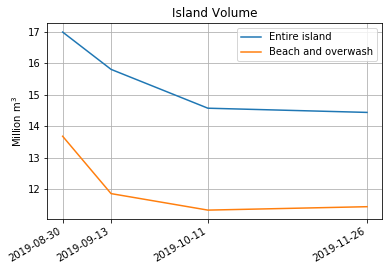

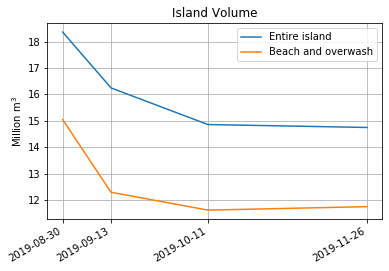

In [11]:
# define all of the functions by runnng this python file
%run -i CoreBx_funcs

# Volume calcs are made wrt this datum:
datum = 0.4 #MHW

# transect end options (holes is misleading...holes are filled with Sep_fill or zeros)
holes = (["clip","extend"])
ihole_list = [0,1]

for ihole in ihole_list:
    print(holes[ihole])

    nmaps = len(dates)
    vsum = np.zeros((nmaps))
    vsumall = np.zeros((nmaps))
    vchange = np.zeros((nmaps-1))
    vchangeall = np.zeros((nmaps-1))

    island_length=0.
    statsfn = "stats_{}.txt".format(holes[ihole])
    sfile = open(statsfn, "w")

    for r in regions:
        print("",file=sfile)
        print(r['name'],file=sfile)
        
        # read in the multi-map .nc file
        fn = r['name']+'.nc'
        dsa = xr.open_dataset(fn)
        dsaa = np.squeeze(dsa.to_array())
        nmaps,ncross,nalong=np.shape(dsaa)
        print('nmaps, ncross, nalong: ',nmaps,ncross,nalong)
        # NaNs below -1 m
        dsaa = dsaa.where(dsaa>=-1.)
        
        # read in the fill map
        fnf = r['name']+'_Sep_fill.nc'                
        dsf = xr.open_dataset(fnf)
        dsfa = np.squeeze(dsf.to_array())
        ncrossf,nalongf=np.shape(dsfa)
        print('ncrossf, nalongf: ',ncrossf,nalongf)
        # NaNs below -1 m
        dsfa = dsfa.where(dsfa>=-1.)       

        map_stats(dsaa,sfile)      
        diffmap = np.squeeze(np.diff(dsaa,axis=0))
        diffmap_tot = np.squeeze( dsaa[-1,:,:]-dsaa[0,:,:])
        print(np.shape(diffmap),file=sfile)
        print("Stats for diffmap:",file=sfile)
        for i in range(0,nmaps-1):
            print("2d stats for diffmap {} minus {}".format(dates[i+1],dates[i]),file=sfile)
            map_stats2d(np.squeeze(diffmap[i,:,:]),sfile)
        print("Stats for last minus first:",file=sfile)
        map_stats2d(diffmap_tot, sfile)

        v = np.zeros((nmaps,nalong))
        vall = v.copy()
        c = np.zeros((nmaps,nalong,2))
        call = c.copy()
        
        xs_start = 0
        xs_end = r['xs_end']
        dxdy = r['dxdy']
        xs_len = (xs_end-xs_start)
        print('xs_len = ',xs_len,' cross-shore length: ',ncross*dxdy,file=sfile)

        # calculate dhi
        dhi = np.nanmax( dsaa[:,0:r['d_end'],:],axis=1)
        print("Shape of dhi: ",np.shape(dhi),file=sfile)

        mean_dhi = np.nanmean(dhi,1)
        std_dhi = np.nanstd(dhi,1)

#         # calculate volumes    
#         # volumes for each transect in beach and overwash terrace (nmaps, nalong)
#         v = np.squeeze(np.nansum(dsaa[:,xs_start:xs_end,:]-datum,axis=1))

#         # volumes for each transect across entire cell (nmaps, nalong)
#         vall = np.squeeze(np.nansum(dsaa[:,:,:]-datum,axis=1))

        dist = np.arange(0,ncross)
        #iprof = 120
        for iprof in range(0,nalong):
            proff = np.squeeze(np.array((dsaa[:,:,iprof])))
            pfill = np.squeeze(np.array((dsfa[:,iprof])))
            title_str = '{0}_Profile_{1}'.format(r['name'].capitalize(),iprof)
            v[:,iprof], c[:,iprof,:]       = pvol(dist[xs_start:xs_end],proff[:,xs_start:xs_end],pfill[xs_start:xs_end],\
                                                  title_str,pnames,imethod=holes[ihole],datum=datum,iverbose=False,iplot=False,iprint=False)
            vall[:,iprof], call[:,iprof,:] = pvol(dist,proff,pfill,\
                                                  title_str,pnames,imethod=holes[ihole],datum=datum,iverbose=False,iplot=False,iprint=False)

        print('Done with volume calcs.')
        print('Done with volume calcs.',file=sfile)

        # respective volume differences (nmaps-1, nalong)
        vdiff = np.squeeze(np.diff(v,axis=0))
        vdiffall = np.squeeze(np.diff(vall,axis=0))

        print('Shape of v: ',np.shape(v),file=sfile)
        print('Shape of vdiff: ',np.shape(vdiff),file=sfile)

        # average transect volume for overwash terrace (nmaps)
        m = np.mean(v,1)
        # average volume change for overwash terrace (nmaps-1)
        mean_dv = np.sum(vdiff,1)/(ncross*dxdy)
        print("m: ",m,file=sfile)
        print("mean_dv",mean_dv,file=sfile)

        # update sum over entire island
        vsum = vsum+np.nansum(v,1)
        vsumall = vsumall+np.nansum(vall,1)
        vchange = vchange+np.sum(vdiff,1)
        vchangeall = vchangeall+np.sum(vdiffall,1)

        island_length = island_length+r['xlen']

        # calculate elevations
        mean_elev_xs_len = np.nanmean(np.nanmean(dsaa[:,0:r['xs_end'],:],1),1)
        mean_elev_all = np.nanmean(np.nanmean(dsaa,1),1)
        print("Mean elevation in overwash terrace (m):",mean_elev_xs_len,file=sfile )
        print("Mean elevation in across entire island (m):",mean_elev_all,file=sfile )

        pc = 100*np.nanmean(vdiff)/np.mean(v)
        pcall = 100*np.nanmean(vdiffall)/np.mean(vall)

        print("Pct volume change in overwash terrace m:",pc,"%",file=sfile)
        print("Pct volume change in across entire island m:",pcall,"%",file=sfile)
        
#         if(False):
#             #% run -i plot_map_vols.py
        
    print('Vsum',vsum,' m3',file=sfile)
    print('Volume change:',vchange, ' m3',file=sfile)
    print('Volume change %',100*vchange/vsum[0], file=sfile)
    print('Vsumall',vsumall,' m3',file=sfile)
    print('Volume change all:',vchangeall, ' m3',file=sfile)
    print('Volume change all %',100*vchangeall/vsumall[0],file=sfile)
    print('Island length:',island_length,' m',file=sfile)
    print('Mean volume change: ',vchange/island_length,' m3/m',file=sfile)

    sfile.close()

    # Plot total volumes
    dtl = []
    for date in dates:
        dtl.append(datetime.strptime(date, "%d %b %Y"))
    dt = np.array(dtl)

    fig, ax = plt.subplots(1)
    fig.autofmt_xdate()
    plt.plot(dt,vsumall/1e6,label="Entire island")
    plt.plot(dt,vsum/1e6,label="Beach and overwash")
    plt.ylabel('Million m$^3$')
    plt.xticks(dt)
    plt.grid()
    plt.legend()
    plt.title('Island Volume')
    fig_name = 'island_volume_{}.svg'.format(holes[ihole])
    plt.savefig(fig_name,bbox_inches='tight', format='svg')

In [8]:
vsum

(4, 3300)